# Explore here

In [4]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.to_csv('../data/raw/DataFrameOriginal.csv',index=False)

In [6]:
df.drop_duplicates()
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
#Revisión de ceros en la glucose, dado que representan menos del 1% del DF (5 valores, los eliminaré)
conteo_ceros = (df['Glucose'] == 0).sum()
print("Número de ceros:", conteo_ceros)


Número de ceros: 5


In [10]:
df = df[df['Glucose'] != 0]
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,69.115334,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,19.399240,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
conteo_ceros = (df['BloodPressure'] == 0).sum()
print("Número de ceros:", conteo_ceros)

Número de ceros: 35


In [12]:
#Imputaré los 35 ceros con la mediana ya que la distribución tiende a ser regular y no es muy afectada por valores atípicos.

mediana_presion = df['BloodPressure'].replace(0, np.nan).median()
df['BloodPressure'] = df['BloodPressure'].replace(0, mediana_presion)
df.describe()


/tmp/ipykernel_3246/1353045631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BloodPressure'] = df['BloodPressure'].replace(0, mediana_presion)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.418087,20.477064,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,12.098656,15.973171,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
conteo_ceros = (df['BMI'] == 0).sum()
print("Número de ceros:", conteo_ceros)

Número de ceros: 11


In [14]:
mediana_bmi = df['BMI'].replace(0, np.nan).median()
df['BMI'] = df['BMI'].replace(0, mediana_bmi)
df.describe()

/tmp/ipykernel_3246/3311764931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'] = df['BMI'].replace(0, mediana_bmi)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.418087,20.477064,80.292267,32.452425,0.472477,33.271298,0.348624
std,3.374729,30.535641,12.098656,15.973171,115.457448,6.878757,0.331963,11.772161,0.476847
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.300000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
conteo_ceros = (df['SkinThickness'] == 0).sum()
print("Número de ceros:", conteo_ceros)

Número de ceros: 227


/tmp/ipykernel_3246/1673058912.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Pregnancies.set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
/tmp/ipykernel_3246/1673058912.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Glucose.set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)


/tmp/ipykernel_3246/1673058912.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Insulin.set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)
/tmp/ipykernel_3246/1673058912.py:126: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_age.set_xticklabels(axis[2,1].get_xticklabels(), rotation=90)


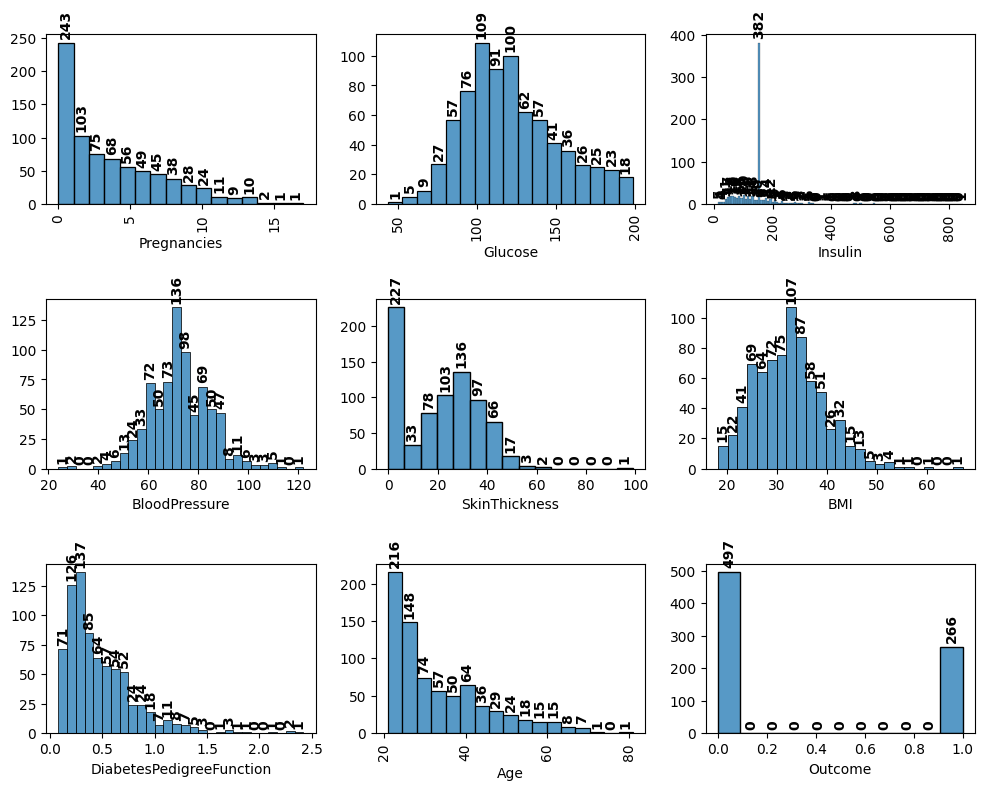

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (10, 8))

Gráfico_Pregnancies = sns.histplot(ax=axis[0,0],data=df, x='Pregnancies')
Gráfico_Pregnancies.set_ylabel('')
Gráfico_Pregnancies.set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
for p in Gráfico_Pregnancies.patches:
    Gráfico_Pregnancies.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_Glucose= sns.histplot(ax=axis[0,1],data=df, x='Glucose')
Gráfico_Glucose.set_ylabel('')
Gráfico_Glucose.set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)
for p in Gráfico_Glucose.patches:
    Gráfico_Glucose.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )


Gráfico_Insulin= sns.histplot(ax=axis[0,2],data=df, x='Insulin')
Gráfico_Insulin.set_ylabel('')
Gráfico_Insulin.set_xticklabels(axis[0,2].get_xticklabels(), rotation=90)
for p in Gráfico_Insulin.patches:
    Gráfico_Insulin.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )


Gráfico_BloodPressure=sns.histplot(ax=axis[1,0],data=df, x='BloodPressure')
Gráfico_BloodPressure.set_ylabel('')
for p in Gráfico_BloodPressure.patches:
    Gráfico_BloodPressure.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )


Gráfico_SkinThickness=sns.histplot(ax=axis[1,1],data=df, x='SkinThickness')
Gráfico_SkinThickness.set_ylabel('')
for p in Gráfico_SkinThickness.patches:
    Gráfico_SkinThickness.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_BMI=sns.histplot(ax=axis[1,2],data=df, x='BMI')
Gráfico_BMI.set_ylabel('')
for p in Gráfico_BMI.patches:
    Gráfico_BMI.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_DiabetesPedigreeFunction=sns.histplot(ax=axis[2,0],data=df, x='DiabetesPedigreeFunction')
Gráfico_DiabetesPedigreeFunction.set_ylabel('')
for p in Gráfico_DiabetesPedigreeFunction.patches:
    Gráfico_DiabetesPedigreeFunction.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_age=sns.histplot(ax=axis[2,1],data=df, x='Age')
Gráfico_age.set_ylabel('')
Gráfico_age.set_xticklabels(axis[2,1].get_xticklabels(), rotation=90)
for p in Gráfico_age.patches:
    Gráfico_age.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_Outcome=sns.histplot(ax=axis[2,2],data=df, x='Outcome')
Gráfico_Outcome.set_ylabel('')
for p in Gráfico_Outcome.patches:
    Gráfico_Outcome.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )
plt.tight_layout()
plt.show()

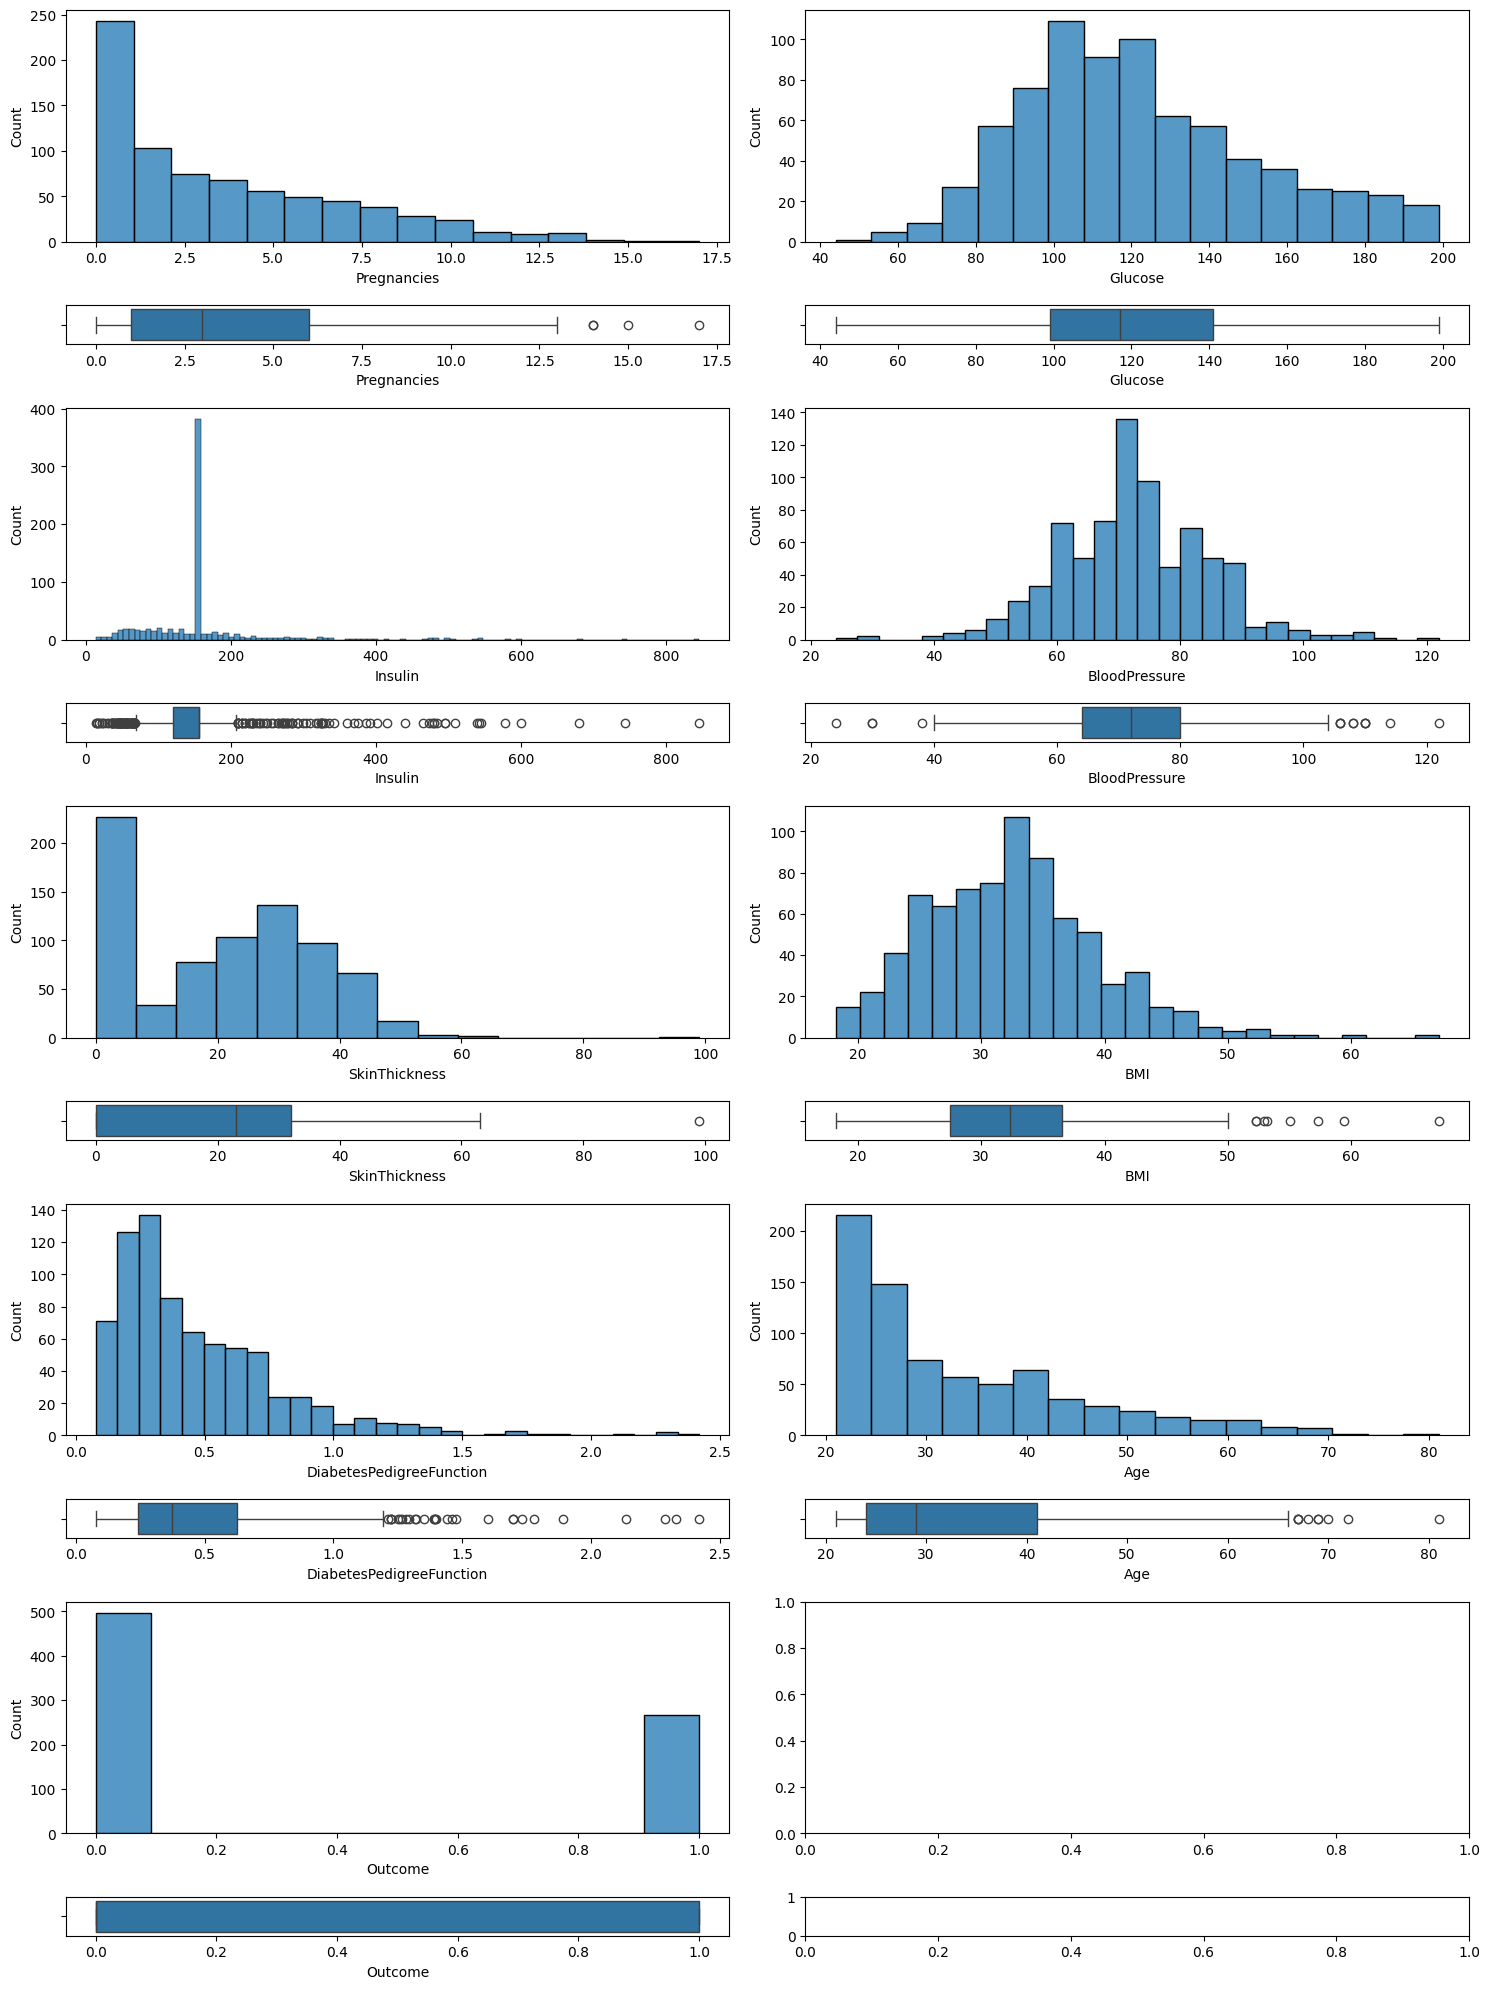

In [38]:
fig, axis = plt.subplots(10, 2, figsize = (15, 20), gridspec_kw={'height_ratios': [6, 1,6,1,6, 1,6,1,6,1]})

sns.histplot(ax=axis[0,0],data=df,x='Pregnancies')
sns.boxplot(ax=axis[1,0],data=df,x='Pregnancies')

sns.histplot(ax=axis[0,1],data=df,x='Glucose')
sns.boxplot(ax=axis[1,1],data=df,x='Glucose')

sns.histplot(ax=axis[2,0],data=df,x='Insulin')
sns.boxplot(ax=axis[3,0],data=df,x='Insulin')

sns.histplot(ax=axis[2,1],data=df,x='BloodPressure')
sns.boxplot(ax=axis[3,1],data=df,x='BloodPressure')

sns.histplot(ax=axis[4,0],data=df,x='SkinThickness')
sns.boxplot(ax=axis[5,0],data=df,x='SkinThickness')

sns.histplot(ax=axis[4,1],data=df,x='BMI')
sns.boxplot(ax=axis[5,1],data=df,x='BMI')

sns.histplot(ax=axis[6,0],data=df,x='DiabetesPedigreeFunction')
sns.boxplot(ax=axis[7,0],data=df,x='DiabetesPedigreeFunction')

sns.histplot(ax=axis[6,1],data=df,x='Age')
sns.boxplot(ax=axis[7,1],data=df,x='Age')

sns.histplot(ax=axis[8,0],data=df,x='Outcome')
sns.boxplot(ax=axis[9,0],data=df,x='Outcome')

plt.tight_layout()
plt.show()

In [37]:
from sklearn.impute import KNNImputer
df['Insulin'] = df['Insulin'].replace(0, np.nan)
# 1. Crear el objeto KNNImputer
# n_neighbors es el número de vecinos más cercanos a considerar (puedes ajustarlo)
imputer = KNNImputer(n_neighbors=80)

# 2. Aplicar el imputador a la columna Insulin
# Selecciona la columna Insulin y conviértela en un array 2D (KNNImputer requiere entrada 2D)
insulina_imputada = imputer.fit_transform(df[['Insulin']])

# 3. Reemplazar la columna original con los valores imputados
df['Insulin'] = insulina_imputada

# 4. Validar que no queden valores en cero
df.describe()

/tmp/ipykernel_3246/551605888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Insulin'] = df['Insulin'].replace(0, np.nan)
/tmp/ipykernel_3246/551605888.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Insulin'] = insulina_imputada


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.418087,20.477064,155.885496,32.452425,0.472477,33.271298,0.348624
std,3.374729,30.535641,12.098656,15.973171,85.163991,6.878757,0.331963,11.772161,0.476847
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,155.885496,32.300000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,155.885496,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


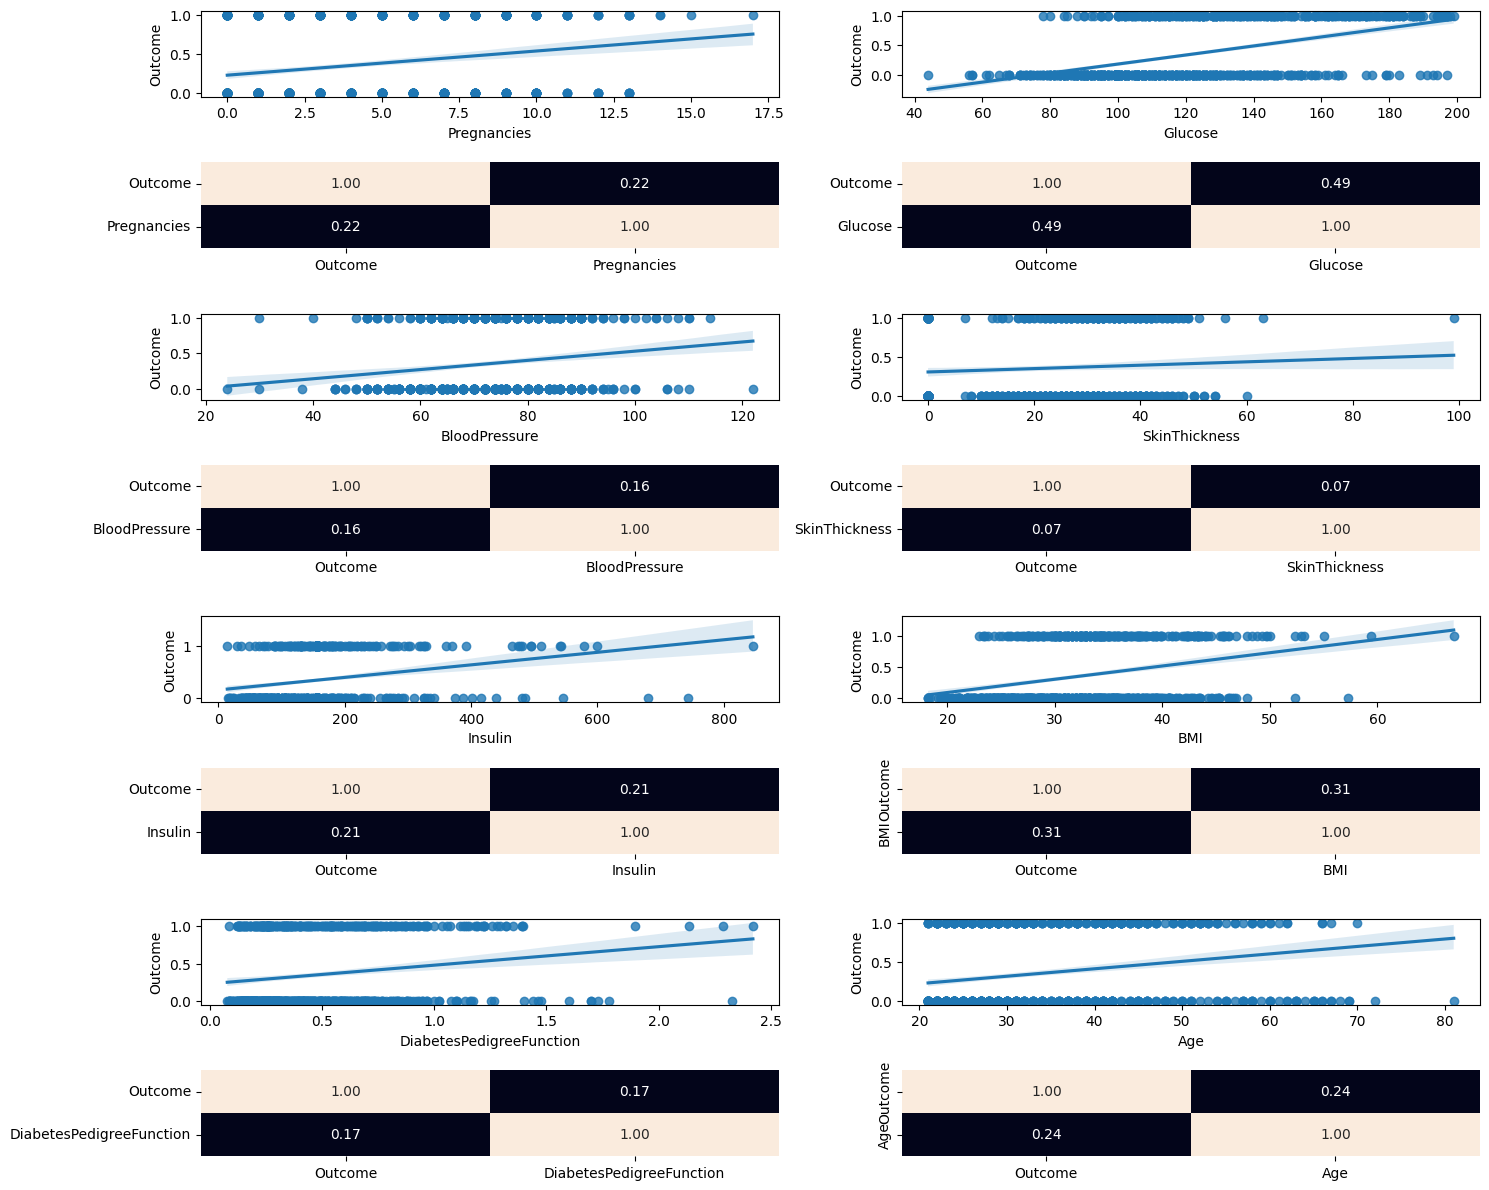

In [41]:
fig, axis = plt.subplots(8, 2, figsize = (15,12))

sns.regplot(ax = axis[0,0], data=df,x='Pregnancies', y='Outcome')
sns.heatmap(df[['Outcome','Pregnancies']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data=df,x='Glucose', y='Outcome')
sns.heatmap(df[['Outcome','Glucose']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax = axis[2,0], data=df,x='BloodPressure', y='Outcome')
sns.heatmap(df[['Outcome','BloodPressure']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

sns.regplot(ax = axis[2,1], data=df,x='SkinThickness', y='Outcome')
sns.heatmap(df[['Outcome','SkinThickness']].corr(),annot=True,fmt='.2f',ax=axis[3,1],cbar=False)

sns.regplot(ax = axis[4,0], data=df,x='Insulin', y='Outcome')
sns.heatmap(df[['Outcome','Insulin']].corr(),annot=True,fmt='.2f',ax=axis[5,0],cbar=False)

sns.regplot(ax = axis[4,1], data=df,x='BMI', y='Outcome')
sns.heatmap(df[['Outcome','BMI']].corr(),annot=True,fmt='.2f',ax=axis[5,1],cbar=False)

sns.regplot(ax = axis[6,0], data=df,x='DiabetesPedigreeFunction', y='Outcome')
sns.heatmap(df[['Outcome','DiabetesPedigreeFunction']].corr(),annot=True,fmt='.2f',ax=axis[7,0],cbar=False)

sns.regplot(ax = axis[6,1], data=df,x='Age', y='Outcome')
sns.heatmap(df[['Outcome','Age']].corr(),annot=True,fmt='.2f',ax=axis[7,1],cbar=False)

plt.tight_layout()
plt.show()

In [43]:
#Vamos a imputar también con la mediana SkinThickness, sin embargo por su baja correlación lo más seguro es que no la usaremos en el entrenamiento de nuestro modelo

from sklearn.impute import KNNImputer
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
# 1. Crear el objeto KNNImputer
# n_neighbors es el número de vecinos más cercanos a considerar (puedes ajustarlo)
imputer = KNNImputer(n_neighbors=80)

# 2. Aplicar el imputador a la columna Insulin
# Selecciona la columna Insulin y conviértela en un array 2D (KNNImputer requiere entrada 2D)
insulina_imputada = imputer.fit_transform(df[['SkinThickness']])

# 3. Reemplazar la columna original con los valores imputados
df['SkinThickness'] = insulina_imputada

# 4. Validar que no queden valores en cero
df.describe()


/tmp/ipykernel_3246/3239893875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
/tmp/ipykernel_3246/3239893875.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'] = insulina_imputada


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.418087,29.149254,155.885496,32.452425,0.472477,33.271298,0.348624
std,3.374729,30.535641,12.098656,8.793643,85.163991,6.878757,0.331963,11.772161,0.476847
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.149254,155.885496,32.300000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,155.885496,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/tmp/ipykernel_3246/167187955.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Age_Outcome.set_xticklabels(Gráfico_Age_Outcome.get_xticklabels(), rotation=90)


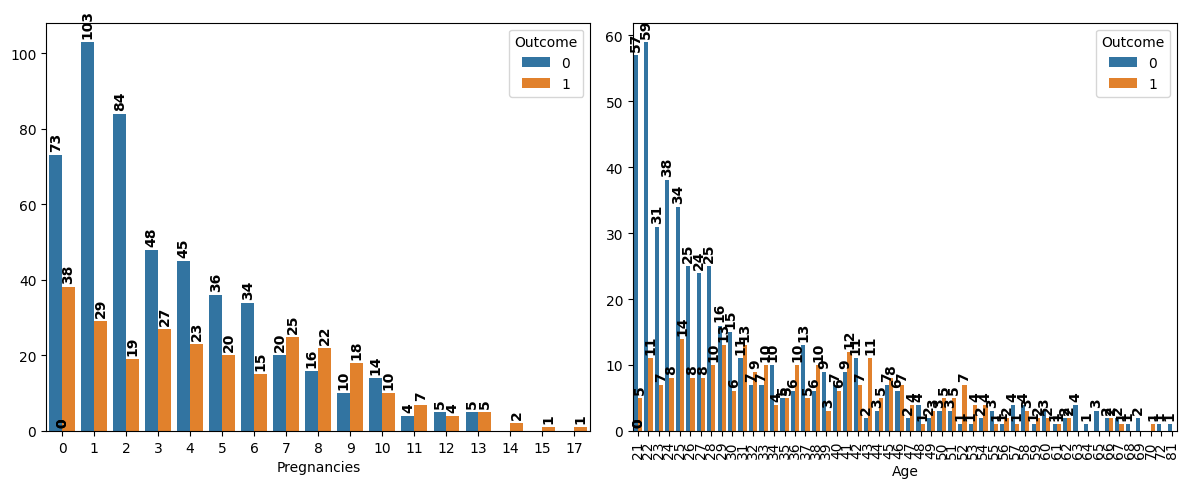

In [59]:
#análisis categórico - categórico

fig, axis = plt.subplots(1, 2, figsize = (12,5))

Gráfico_Pregnancies_Outcome = sns.countplot(data=df, x='Pregnancies',hue='Outcome',ax=axis[0])
Gráfico_Pregnancies_Outcome.set_ylabel('')
for p in Gráfico_Pregnancies_Outcome.patches:
    Gráfico_Pregnancies_Outcome.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

Gráfico_Age_Outcome = sns.countplot(data=df, x='Age',hue='Outcome',ax=axis[1])
Gráfico_Age_Outcome.set_ylabel('')
Gráfico_Age_Outcome.set_xticklabels(Gráfico_Age_Outcome.get_xticklabels(), rotation=90)
for p in Gráfico_Age_Outcome.patches:
    Gráfico_Age_Outcome.annotate(
        f'{int(p.get_height())}',  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',  
        va='baseline', 
        fontsize=10,  
        color='black',
        rotation=90,
        weight= 'bold',
        xytext=(0, 5), 
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

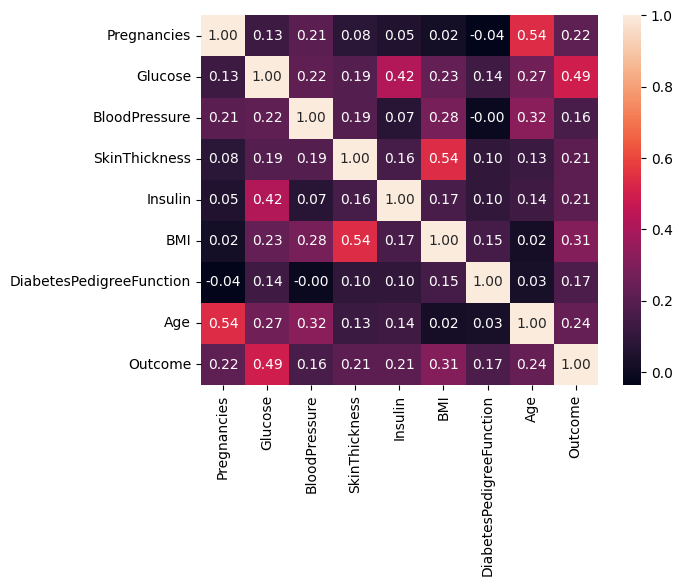

In [60]:
#Se evidencia que hay una relación directamente proporcional entre Diabetes y embarazos, diabetes y Edad.

#Veamos el heatmap

columnas_correlacion =['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

sns.heatmap(df[columnas_correlacion].corr(),annot=True,fmt='.2f')
plt.show()


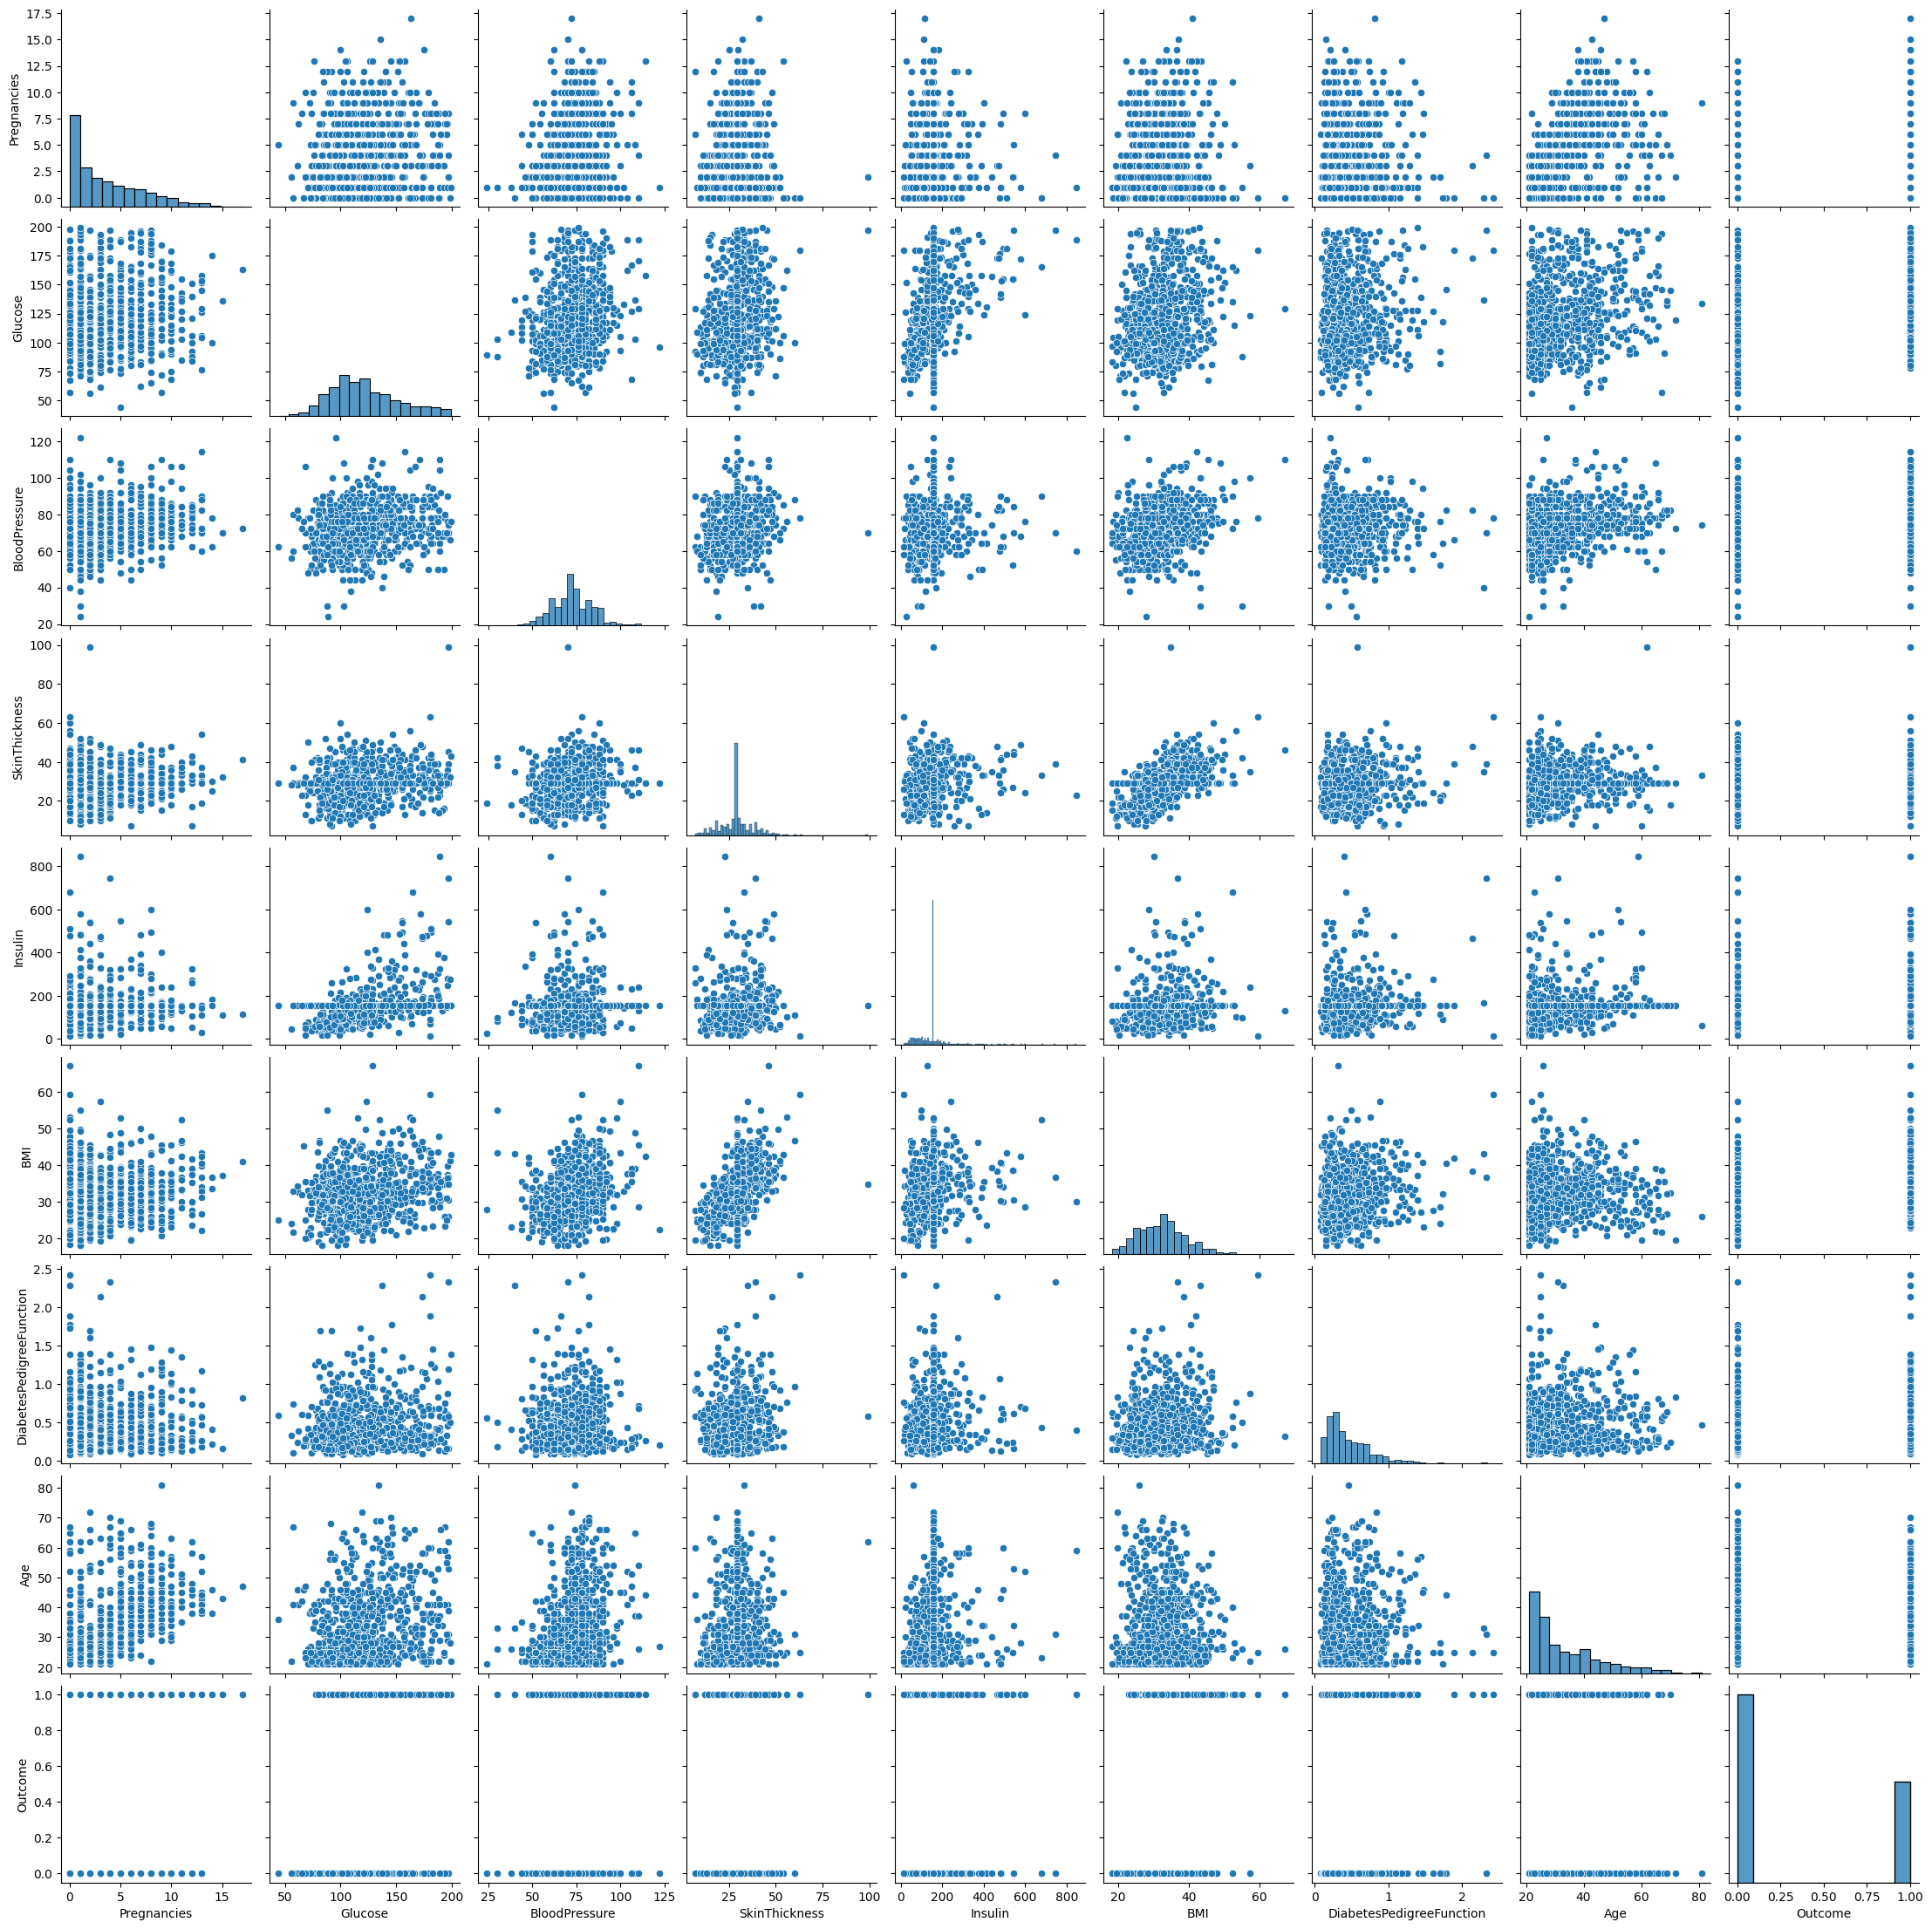

In [61]:
sns.pairplot(data=df)
plt.show()

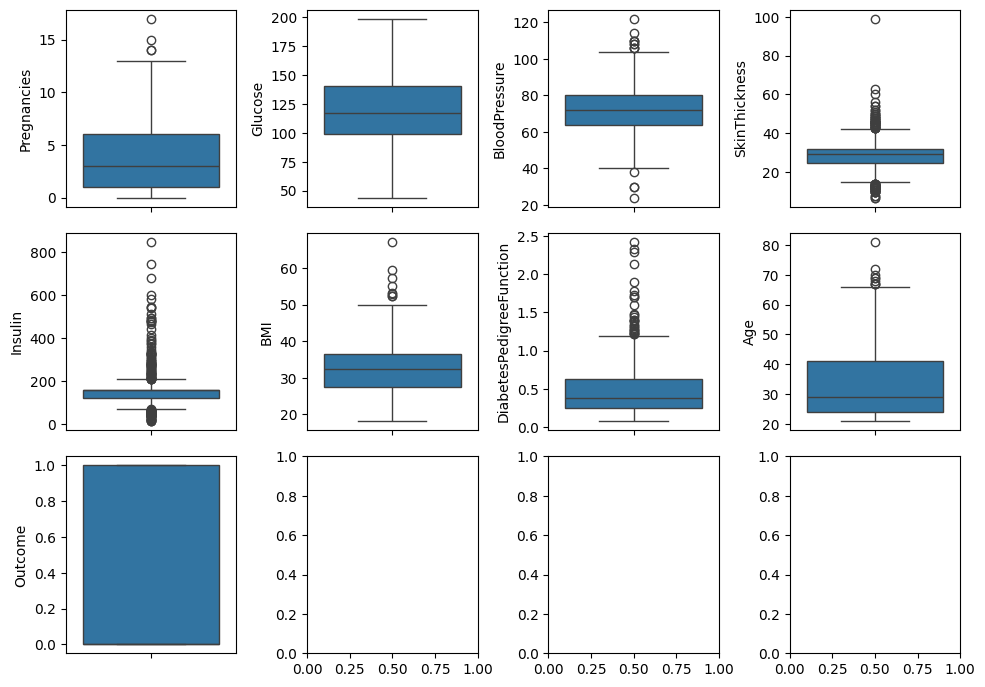

In [64]:
listado_boxplots = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']

fig, axis = plt.subplots(3, 4, figsize = (10, 7))

contador =0
for columna in listado_boxplots:
    sns.boxplot(ax = axis[contador//4,contador%4],data=df,y=columna)
    contador +=1

plt.tight_layout()
plt.show()

In [66]:
from sklearn.model_selection import train_test_split

#Modelo sin SkinThickness

X = df.drop(['Outcome','SkinThickness'],axis=1)
y = df['Outcome']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.2,random_state=42)

X_train1.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
338,9,152,78,171.000000,34.2,0.893,33
728,2,175,88,155.885496,22.9,0.326,22
292,2,128,78,182.000000,43.3,1.224,31
690,8,107,80,155.885496,24.6,0.856,34
91,4,123,80,176.000000,32.0,0.443,34


In [67]:
#Modelo con SkinThickness

X = df.drop(['Outcome'],axis=1)
y = df['Outcome']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=0.2,random_state=42)

X_train2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
338,9,152,78,34.000000,171.000000,34.2,0.893,33
728,2,175,88,29.149254,155.885496,22.9,0.326,22
292,2,128,78,37.000000,182.000000,43.3,1.224,31
690,8,107,80,29.149254,155.885496,24.6,0.856,34
91,4,123,80,15.000000,176.000000,32.0,0.443,34


In [68]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train1,y_train1)

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train2,y_train2)

DecisionTreeClassifier(random_state=42)

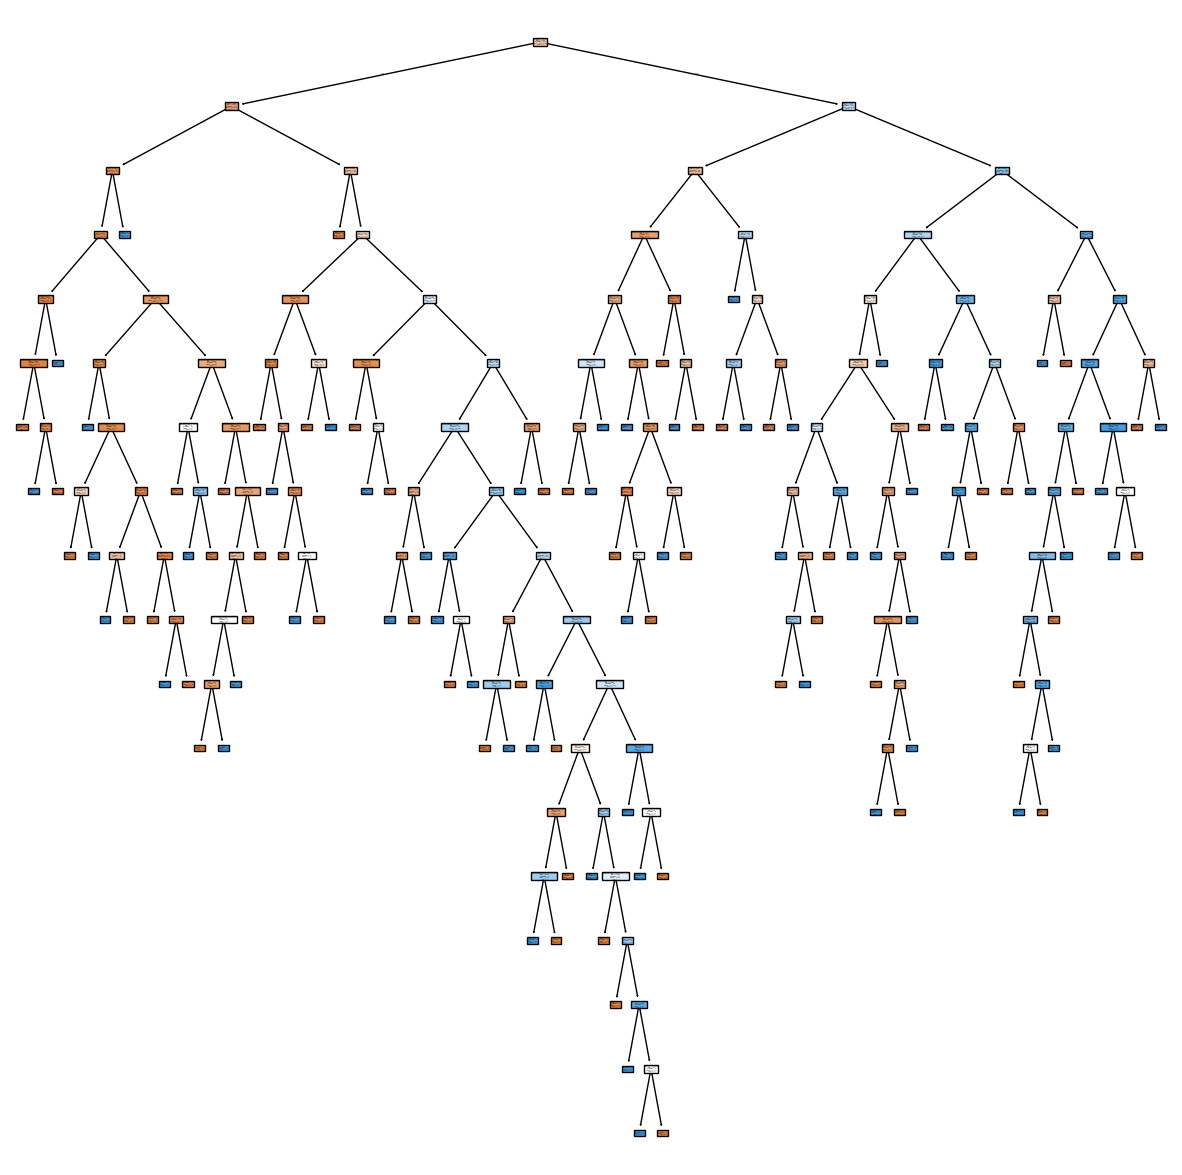

In [69]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model1, feature_names = list(X_train1.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [ ]:
y_pred1 = model1.predict(X_test1)
y_pred1

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [72]:
y_pred2 = model2.predict(X_test2)
y_pred2

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [73]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test1,y_pred1)

0.7058823529411765

In [74]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test2,y_pred2)

0.6862745098039216

In [84]:
model3 = DecisionTreeClassifier(random_state=42,criterion='entropy')
model4 = DecisionTreeClassifier(random_state=42,criterion='log_loss')

model3.fit(X_train1,y_train1)
model4.fit(X_train1,y_train1)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

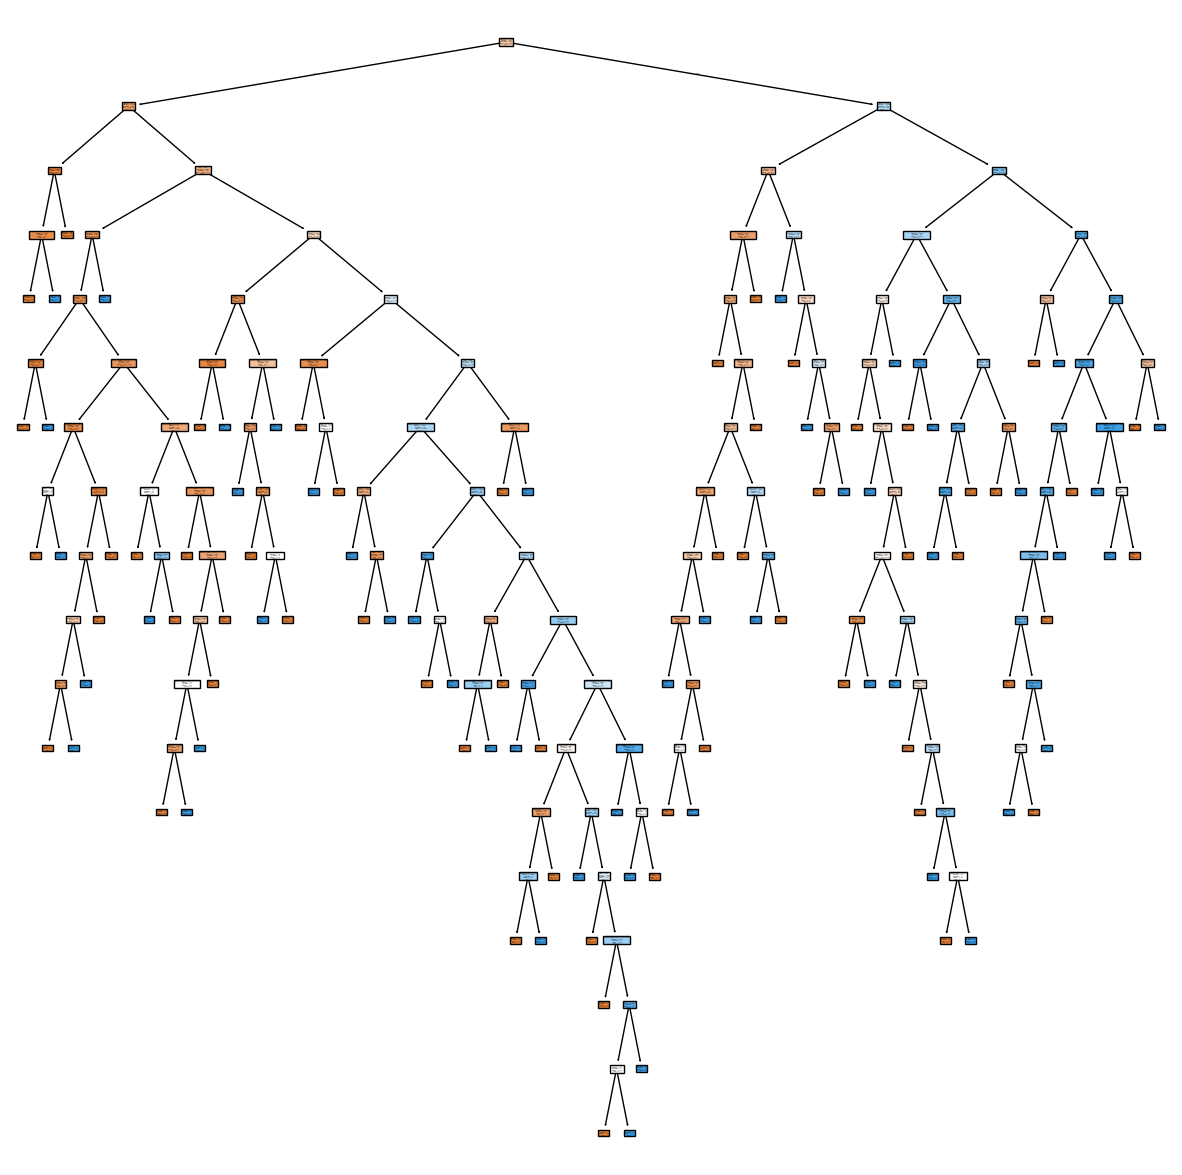

In [85]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model3, feature_names = list(X_train1.columns), class_names = ["0", "1"], filled = True)

plt.show()

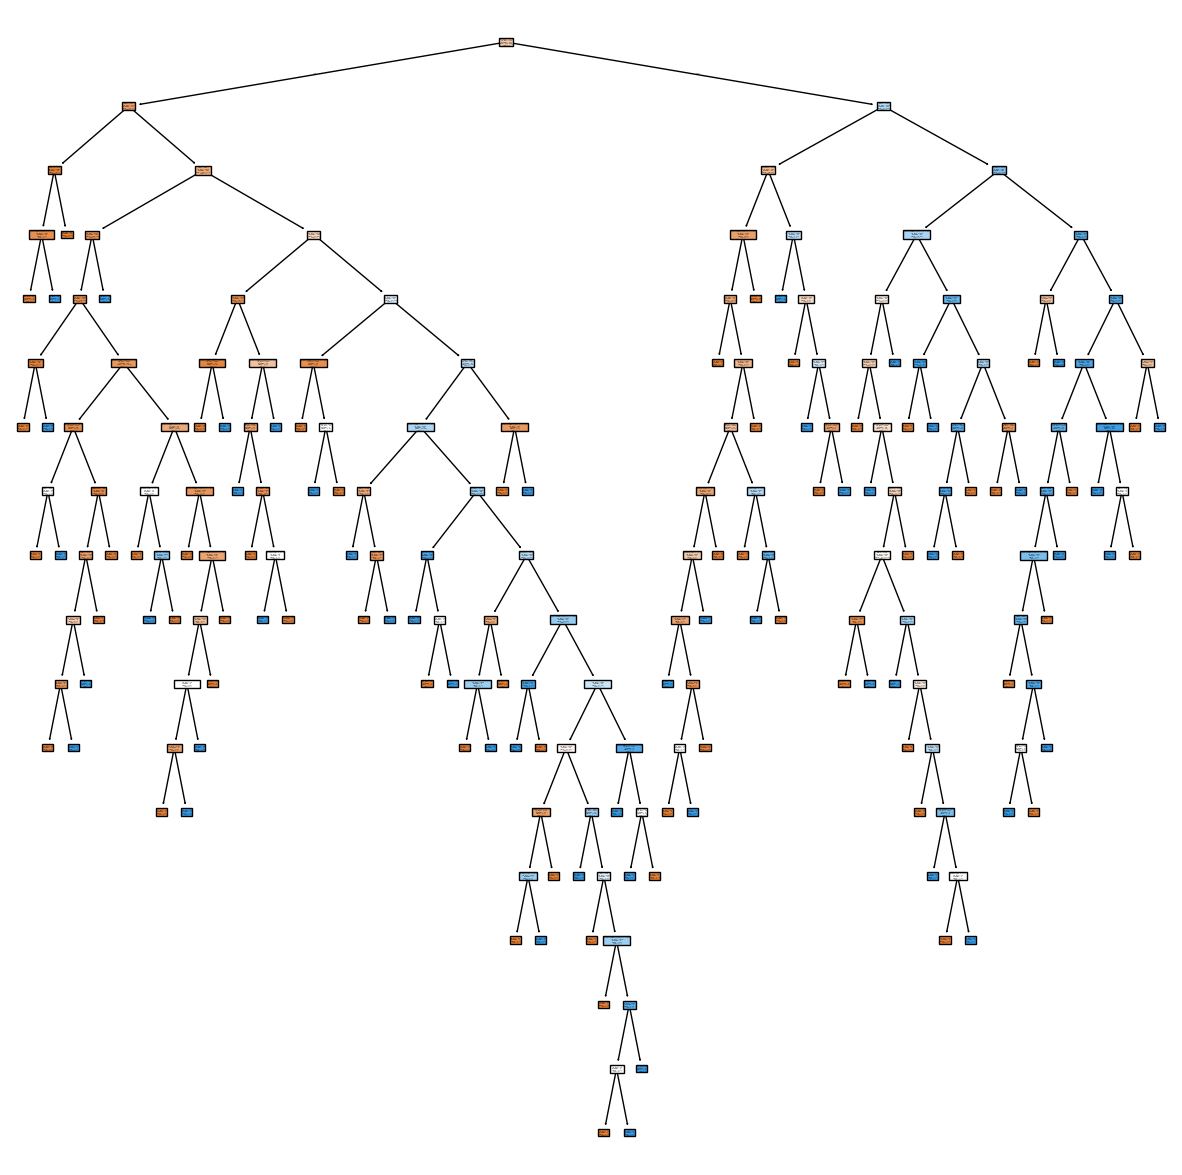

In [86]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model4, feature_names = list(X_train1.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [87]:
y_pred_entropy = model3.predict(X_test1)
print(accuracy_score(y_test1,y_pred_entropy))
y_pred_log_loss = model4.predict(X_test1)
print(accuracy_score(y_test1,y_pred_log_loss))


0.7189542483660131
0.7189542483660131


In [88]:

grid = {
    'criterion' : ['gini','log_loss','entropy'],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [1,2,4,6,8],
    'max_features' : ['auto','sqrt','log2',2,3,4,5]
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model1,grid,scoring='accuracy')
clf.fit(X_train1,y_train1)

best_model = clf.best_estimator_

print(clf.best_params_)
print(clf.best_score_)


{'criterion': 'log_loss', 'max_features': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.7524590163934427


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

In [90]:
best_model.feature_importances_

array([0.02334757, 0.37116024, 0.03184688, 0.05978893, 0.25790365,
       0.16267812, 0.09327462])

In [89]:
X_train1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
#Se concluye que el mejor modelo fue el visto en la sesión sin EDA que arrojo 0.760575769692123 y conservando todos los datos, sin hacer imputaciones.
#Vale la pena evaluarlo sin SkinThickness para ver si mejora.

In [30]:
from pickle import dump
dump(best_model,open('../models/decission_tree_clasiffier_42_log_loss_max_features_5_min_samples_leaf_8_min_samples_split_2.model','wb'))